Male
Average F1 score on the train sample 75.5%
CI F1 score on the train sample 2.3%
Average Sensitivity on the train sample 69.6%
CI Sensitivity on the train sample 2.8%
Average Positive Predictive Value on the train sample 82.5%
CI Positive Predictive Value on the train sample 2.8%
Parameters XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, min_split_loss=1.0, missing=nan,
              n_estimators=330, n_jobs=1, nthread=1,
              objective='binary:logistic', random_state=5,
              reg_alpha=0.6000000000000001, reg_lambda=3.0, scale_pos_weight=10,
              seed=None, silent=None, subsample=1, verbosity=1)
Female
Average F1 score on the train sample 76.1%
CI F1 score on the train sample 1.6%
Average Sensitivity on the train sample 75.5%
CI Sensitivity on the train sample 2.2%
Average P

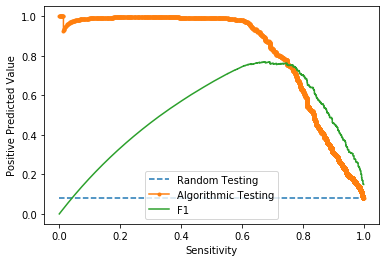

: F1 score = 0.78 - Area under Curve = 0.87


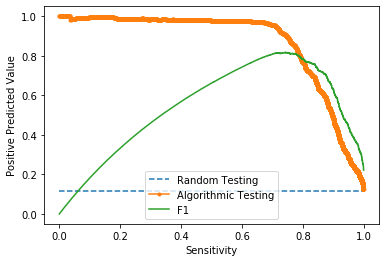

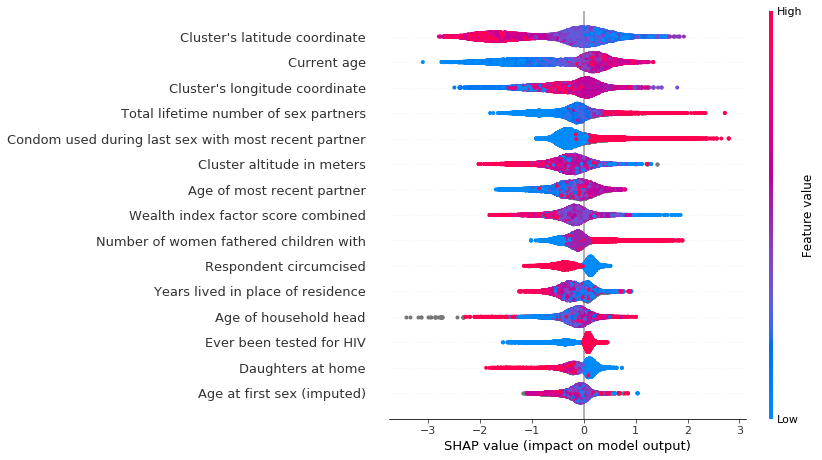

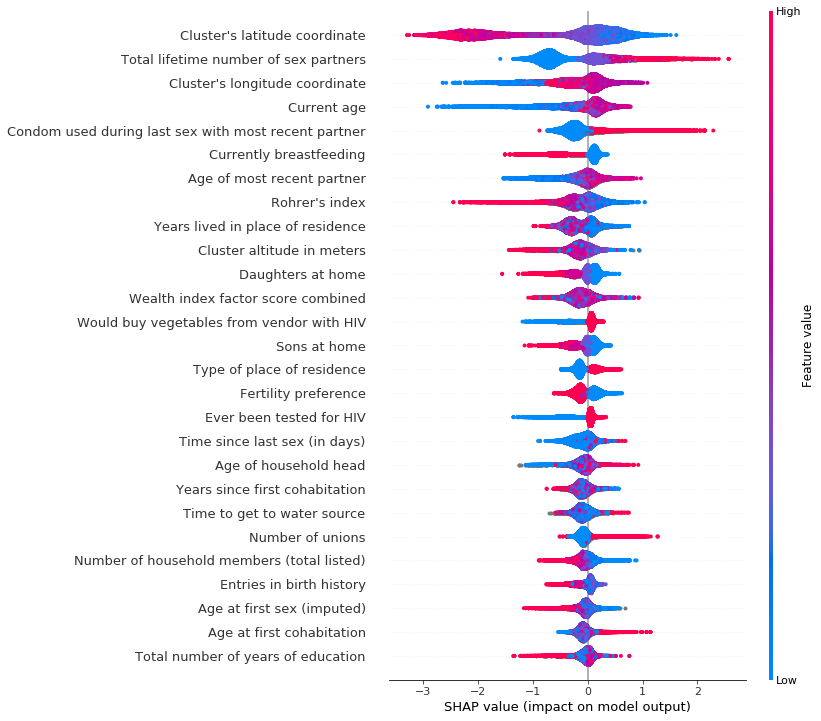

In [5]:
%run -i "xgb_entire_pure_data/xgb_entire_pure_data_results.py"

Confusion matrix on the train dataset: [[40555    31]
 [    0  3534]]
Average F1 score on the train sample 74.9%
CI F1 score on the train sample 2.1%
Average Sensitivity on the train sample 71.2%
CI Sensitivity on the train sample 3.7%
Average Positive Predicted Value on the train sample 79.1%
CI Positive Predicted Value on the train sample 1.0%
Parameters XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=18, min_split_loss=0.8, missing=nan,
              n_estimators=450, n_jobs=1, nthread=1,
              objective='binary:logistic', random_state=5,
              reg_alpha=0.30000000000000004, reg_lambda=6.0,
              scale_pos_weight=10, seed=None, silent=None, subsample=1,
              verbosity=1)
Confusion matrix on the train dataset: [[49179   112]
 [    0  6409]]
Average F1 score on the train sa

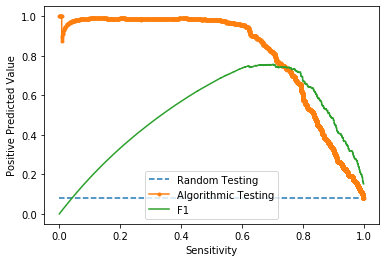

: F1 score = 0.78 - Area under Curve = 0.86


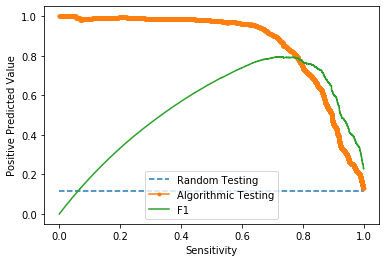

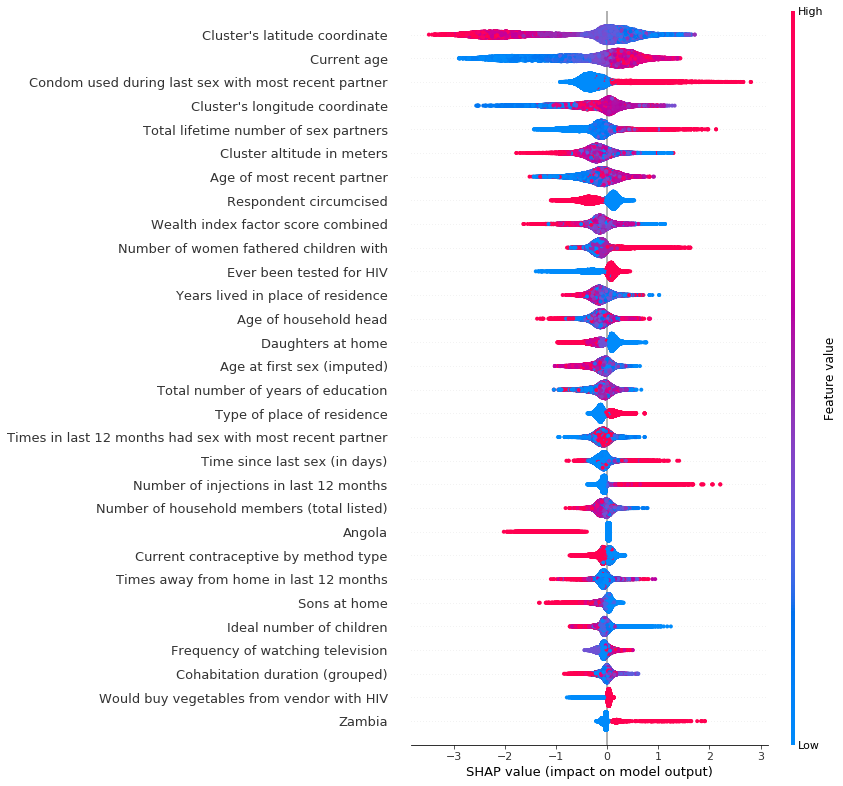

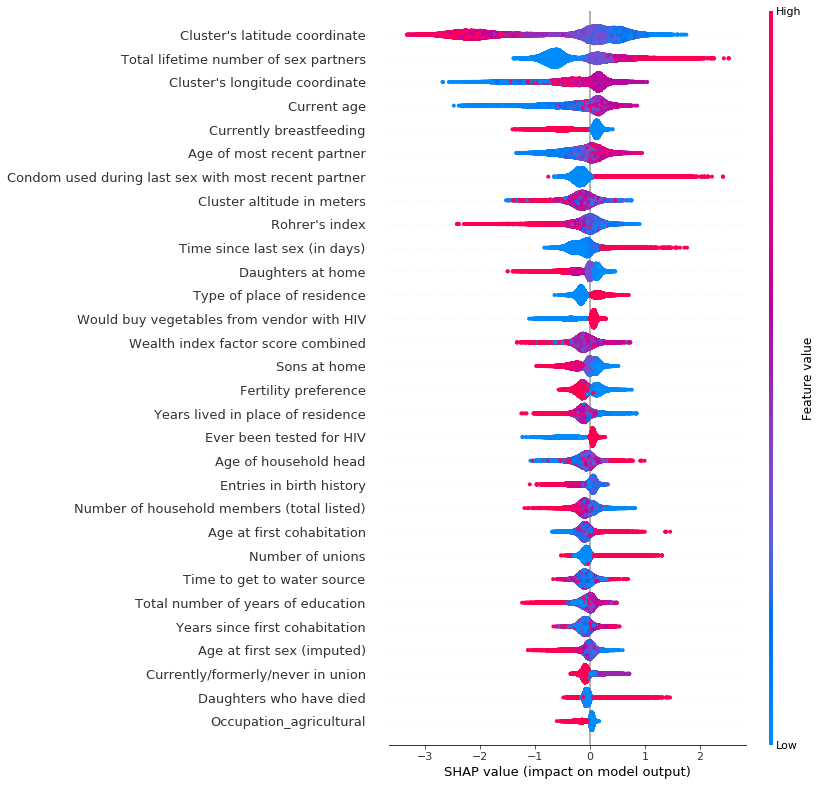

In [4]:
%run -i "xgb_entire_mice/xgb_entire_mice_results.py"

Confusion matrix on the train dataset: [[40581     5]
 [    0  3534]]
Average F1 score on the train sample 73.7%
CI F1 score on the train sample 3.7%
Average Sensitivity on the train sample 67.9%
CI Sensitivity on the train sample 3.2%
Average Positive Predictive Value on the train sample 80.7%
CI Positive Predictive Value on the train sample 4.8%
Parameters XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=4, min_split_loss=0.2, missing=nan,
              n_estimators=90, n_jobs=1, nthread=1, objective='binary:logistic',
              random_state=5, reg_alpha=0.1, reg_lambda=4.0, scale_pos_weight=4,
              seed=None, silent=None, subsample=1, verbosity=1)
Confusion matrix on the train dataset: [[49291     0]
 [    0  6409]]
Average F1 score on the train sample 75.6%
CI F1 score on the train sample 1.

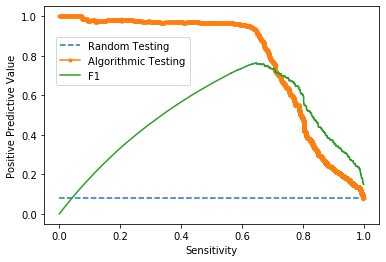

: F1 score = 0.80 - Area under Curve = 0.86


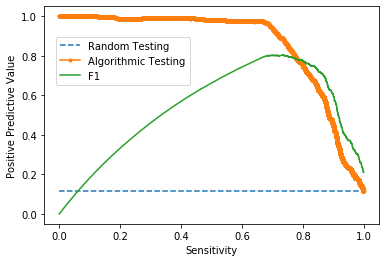

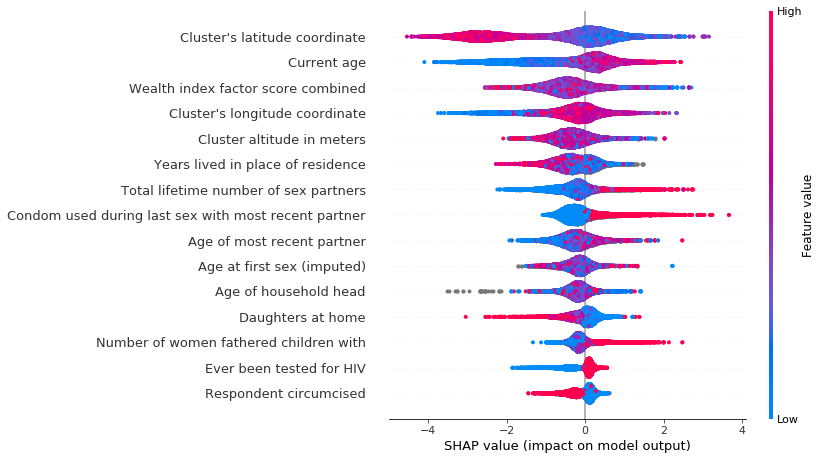

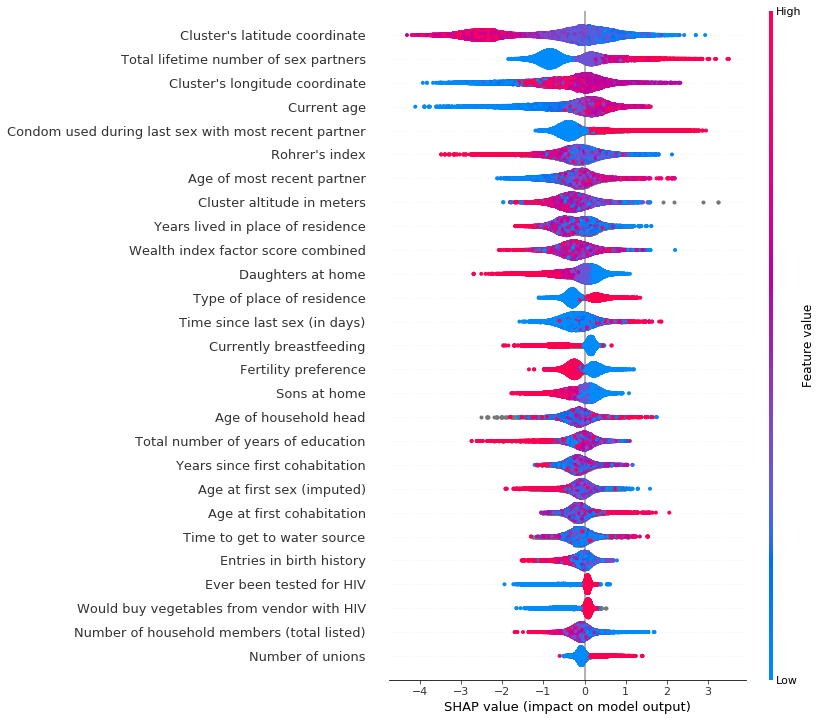

In [6]:
%run -i "xgb_selected/xgb_15_27_pure_data_results.py"

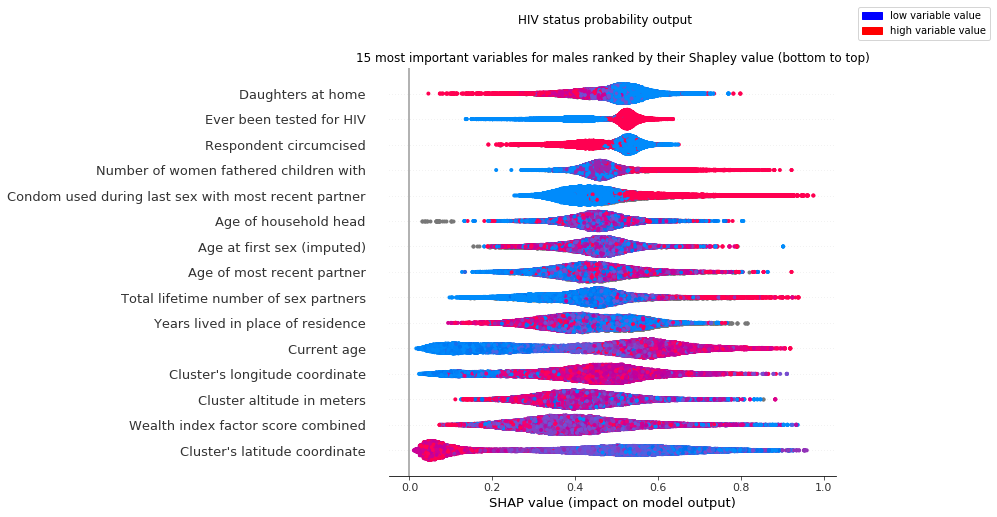

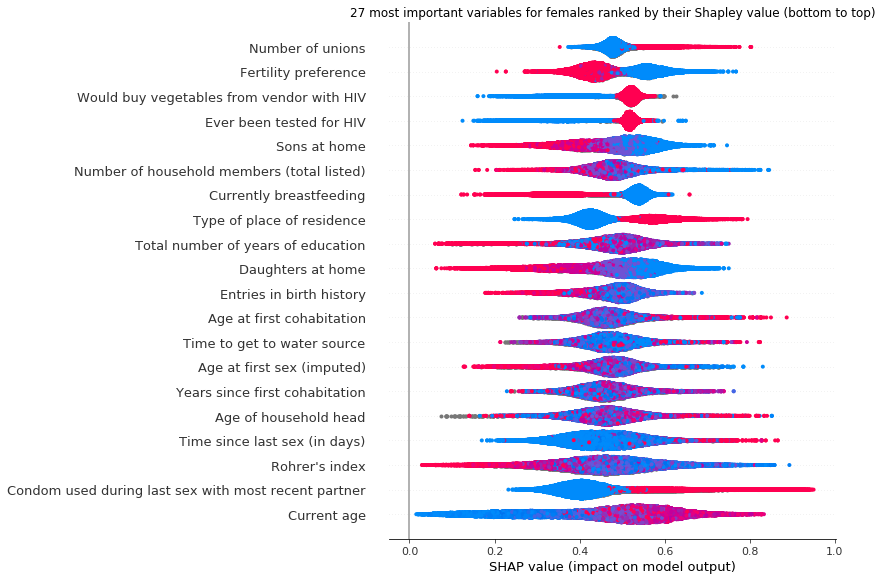

In [74]:
# Plot summary_plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue', label='low variable value')
red_patch = mpatches.Patch(color='red', label='high variable value')

plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1.15), loc='upper left', borderaxespad=0.)
plt.suptitle('HIV status probability output')
plt.title('15 most important variables for males ranked by their Shapley value (bottom to top)')
shap.summary_plot(np.exp(MR_shap_values)/(1+np.exp(MR_shap_values)), MR_X_train_selected_20, color_bar=False)
plt.title('27 most important variables for females ranked by their Shapley value (bottom to top)')
shap.summary_plot(np.exp(IR_shap_values)/(1+np.exp(IR_shap_values)), IR_X_train_selected_20, color_bar=False)

In [37]:
import warnings
MR_expected_value = MR_explainer.expected_value
if isinstance(MR_expected_value, list):
    MR_expected_value = MR_expected_value[1]
print(f"Explainer expected value: {MR_expected_value}")

#features_display = X_display.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    MR_shap_values = MR_explainer.shap_values(MR_X_train_selected_20)[1]
    MR_shap_interaction_values = MR_explainer.shap_interaction_values(MR_X_train_selected_20)
if isinstance(MR_shap_interaction_values, list):
    MR_shap_interaction_values = MR_shap_interaction_values[1]

  

Explainer expected value: -1.4707622528076172


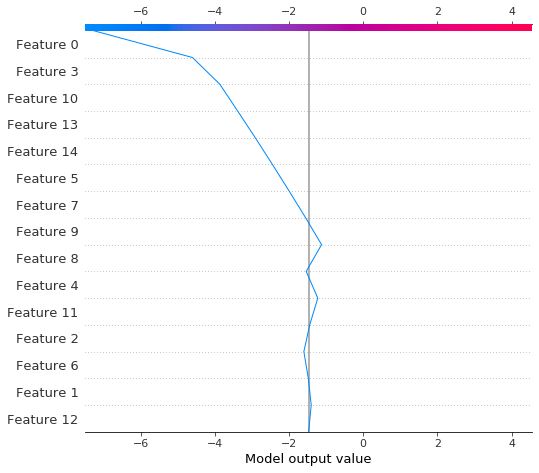

In [38]:
shap.decision_plot(MR_expected_value, MR_shap_values)